In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
file = "/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv"

In [ ]:
df = pd.read_csv(file) # Load data

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
average_length = df['comment_text'].apply(len).mean()
print("Average character count of a text", average_length)

Average character count of a text 394.0732213246768


{'toxic': 15294, 'severe_toxic': 1595, 'obscene': 8449, 'threat': 478, 'insult': 7877, 'identity_hate': 1405}


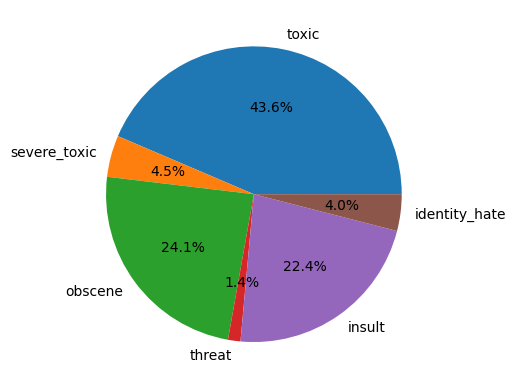

In [ ]:
counts = dict()
for column in df.columns[2:]:
    counts[column] = df[column].sum()

print(counts)

plt.figure()
labels = list(counts.keys())
values = list(counts.values())
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

# EDA toxic

In [ ]:
df[df['toxic'] == 1].head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


In [ ]:
df_toxic_labels = df.columns[2:]
df['num_of_labels'] = df[df_toxic_labels].sum(axis=1)
print("Number of comments with multiple labels: ", (df['num_of_labels']>1).sum())

Number of comments with multiple labels:  9865


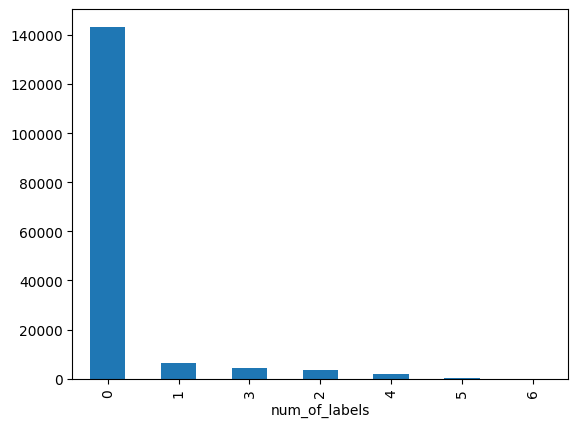

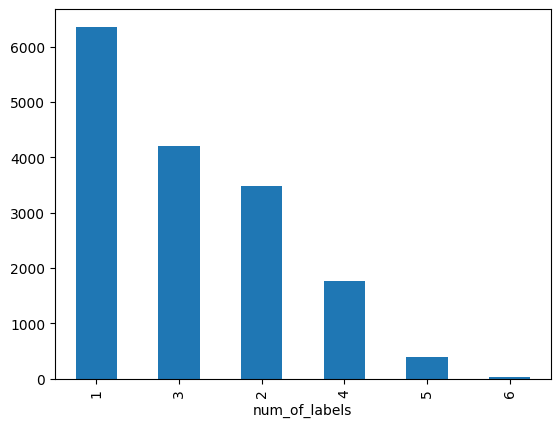

In [ ]:
plt.figure()
df['num_of_labels'].value_counts().plot(kind='bar')
plt.show()

plt.figure()
df[df['num_of_labels']>0]['num_of_labels'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
def plot_wordcloud(column_name, top):
    """
    Generate and display a word cloud from the specified text column of a DataFrame.

    Parameters
    ----------
    column_name : str
        The name of the column in a pandas DataFrame containing the text data.

    top : int
        The number of top words you want to see
    """

    text = ' '.join(df[df[column_name] == 1]['comment_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

    word_frequencies = wordcloud.words_
    top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:top]
    print(f"Top {top} words are:")
    for word, freq in top_words:
        print(f"{word:<20} {freq:<20}")


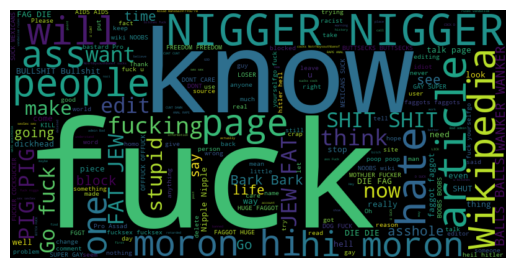

Top 30 words are:
fuck                 1.0                 
know                 0.541055341055341   
NIGGER NIGGER        0.5186615186615187  
article              0.4646074646074646  
hate                 0.46332046332046334 
people               0.44736164736164735 
will                 0.44272844272844275 
Wikipedia            0.4195624195624196  
page                 0.4092664092664093  
ass                  0.40592020592020595 
moron hi             0.37966537966537967 
hi moron             0.3788931788931789  
one                  0.3703989703989704  
fucking              0.3564993564993565  
think                0.331016731016731   
PIG PIG              0.32149292149292147 
JEW FAT              0.3176319176319176  
FAT JEW              0.31557271557271555 
want                 0.30296010296010295 
edit                 0.3014157014157014  
SHIT SHIT            0.2947232947232947  
Go fuck              0.29034749034749036 
now                  0.2805662805662806  
stupid          

In [ ]:
plot_wordcloud('toxic', 30)

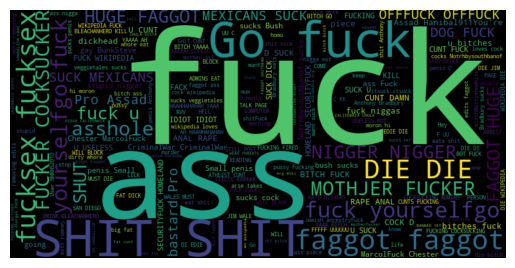

Top 30 words are:
fuck                 1.0                 
ass                  0.5873563218390805  
SHIT SHIT            0.5747126436781609  
Go fuck              0.5304597701149425  
faggot faggot        0.40977011494252874 
DIE DIE              0.3632183908045977  
fucksex fucksex      0.35804597701149427 
fuck yourselfgo      0.3568965517241379  
yourselfgo fuck      0.3568965517241379  
asshole              0.3017241379310345  
MOTHJER FUCKER       0.2810344827586207  
FUCKER COCKSUCKER    0.2810344827586207  
NIGGER NIGGER        0.25689655172413794 
HUGE FAGGOT          0.23908045977011494 
FAGGOT HUGE          0.23908045977011494 
SHUT                 0.23333333333333334 
fuck u               0.21551724137931033 
OFFFUCK OFFFUCK      0.20632183908045976 
MEXICANS SUCK        0.2045977011494253  
SUCK MEXICANS        0.20402298850574713 
DOG FUCK             0.20402298850574713 
bastard Pro          0.19942528735632184 
Pro Assad            0.19942528735632184 
Assad Hanibal911

In [ ]:
plot_wordcloud('severe_toxic', 30)

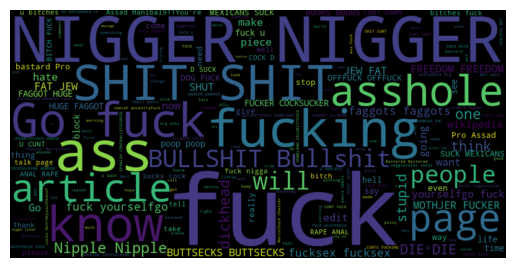

Top 30 words are:
fuck                 1.0                 
NIGGER NIGGER        0.606015037593985   
ass                  0.4475187969924812  
fucking              0.3804511278195489  
SHIT SHIT            0.3443609022556391  
know                 0.34225563909774437 
Go fuck              0.3374436090225564  
asshole              0.26165413533834586 
article              0.25954887218045114 
page                 0.25413533834586466 
BULLSHIT Bullshit    0.2499248120300752  
will                 0.24781954887218044 
people               0.2294736842105263  
Nipple Nipple        0.2294736842105263  
one                  0.21293233082706767 
dickhead             0.21293233082706767 
think                0.1924812030075188  
DIE DIE              0.1924812030075188  
stupid               0.18766917293233082 
faggots faggots      0.18766917293233082 
fucksex fucksex      0.18736842105263157 
fuck yourselfgo      0.18676691729323308 
yourselfgo fuck      0.18676691729323308 
JEW FAT         

In [ ]:
plot_wordcloud('obscene', 30)

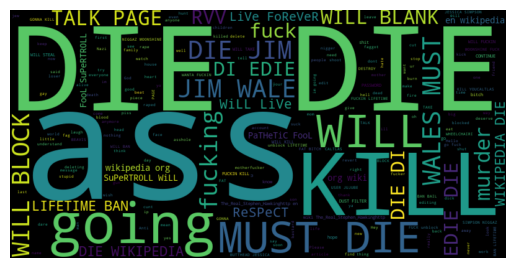

Top 30 words are:
ass                  1.0                 
DIE DIE              0.8294270833333334  
KILL                 0.3997395833333333  
going                0.3645833333333333  
WILL                 0.23697916666666666 
MUST DIE             0.20833333333333334 
JIM WALE             0.20572916666666666 
WALES MUST           0.203125            
DIE JIM              0.203125            
WILL BLOCK           0.19401041666666666 
fucking              0.1796875           
murder               0.13932291666666666 
TALK PAGE            0.13151041666666666 
RVV                  0.125               
fuck                 0.12239583333333333 
WILL BLANK           0.12239583333333333 
DIE DI               0.1171875           
DI EDIE              0.1171875           
EDIE DIE             0.1171875           
DIE WIKIPEDIA        0.11588541666666667 
WIKIPEDIA DIE        0.11458333333333333 
LIFETIME BAN         0.11328125          
ReSPeCT              0.09895833333333333 
WiLL LiVe       

In [ ]:
plot_wordcloud('threat', 30)

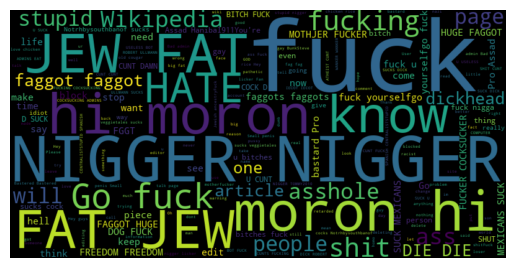

Top 30 words are:
fuck                 1.0                 
NIGGER NIGGER        0.6688871473354232  
moron hi             0.4988244514106583  
hi moron             0.49764890282131663 
JEW FAT              0.4835423197492163  
FAT JEW              0.48040752351097177 
know                 0.4408307210031348  
HATE                 0.43377742946708464 
Go fuck              0.429858934169279   
fucking              0.40948275862068967 
shit                 0.3667711598746082  
Wikipedia            0.36363636363636365 
ass                  0.359717868338558   
asshole              0.3248432601880878  
people               0.302115987460815   
stupid               0.3017241379310345  
will                 0.29858934169278994 
page                 0.2927115987460815  
faggot faggot        0.28056426332288403 
dickhead             0.2754702194357367  
article              0.26802507836990597 
one                  0.2554858934169279  
DIE DIE              0.25039184952978055 
faggots faggots 

In [ ]:
plot_wordcloud('insult', 30)

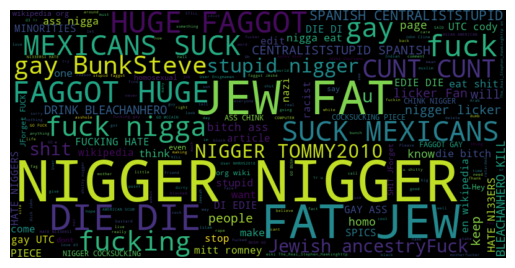

Top 30 words are:
NIGGER NIGGER        1.0                 
JEW FAT              0.649132035770647   
FAT JEW              0.6449237243556023  
DIE DIE              0.3335086796422935  
HUGE FAGGOT          0.22041031036296685 
FAGGOT HUGE          0.21883219358232509 
fuck                 0.21725407680168332 
MEXICANS SUCK        0.18726985796948975 
SUCK MEXICANS        0.18674381904260914 
fuck nigga           0.17727511835875856 
gay                  0.1751709626512362  
fucking              0.16570226196738558 
gay BunkSteve        0.1457127827459232  
CUNT CUNT            0.14518674381904262 
stupid nigger        0.12730142030510258 
NIGGER TOMMY2010     0.11888479747501315 
Jewish ancestryFuck  0.10941609679116254 
u                    0.10783798001052078 
shit                 0.10783798001052078 
SPANISH CENTRALISTSTUPID 0.09416096791162545 
CENTRALISTSTUPID SPANISH 0.09416096791162545 
nigger licker        0.09310889005786428 
licker Fan           0.09310889005786428 
people  

In [ ]:
plot_wordcloud('identity_hate', 30)

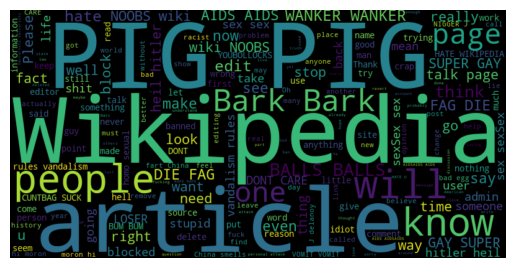

Top 30 words are:
Wikipedia            1.0                 
PIG PIG              0.9968076616121309  
article              0.9321628092577813  
people               0.8387869114126097  
will                 0.8300079808459697  
know                 0.7988826815642458  
Bark Bark            0.7972865123703112  
page                 0.7158818834796489  
one                  0.7039106145251397  
BALLS BALLS          0.6640063846767758  
think                0.6073423782920989  
WANKER WANKER        0.5690343176376695  
hate                 0.5666400638467678  
edit                 0.5554668794892259  
DIE FAG              0.49880287310454907 
FAG DIE              0.4980047885075818  
now                  0.47406225059856344 
AIDS AIDS            0.47007182761372707 
see                  0.46368715083798884 
even                 0.4604948124501197  
make                 0.44692737430167595 
say                  0.4421388667198723  
want                 0.41101356743814843 
SUPER GAY       

In [ ]:
plot_wordcloud('num_of_labels', 30)

# Preprocessing

In [ ]:
df.pop('num_of_labels')
df_train = df
df_test = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv")

train_text = df_train['comment_text']
test_text = df_test['comment_text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

char_vectorizer = TfidfVectorizer(
    stop_words='english',
    strip_accents='unicode',
    min_df=3,
    max_df=0.9,
    smooth_idf=1,
    sublinear_tf=1,
    ngram_range=(1,4),
    analyzer='char',
    max_features=50000
)

char_vectorizer.fit(train_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000
)

word_vectorizer.fit(train_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [ ]:
from scipy.sparse import hstack
train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

In [ ]:
class_names = df.columns[2:]
print(class_names)

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


# Learning

CV score for class toxic is 0.9701562326623204
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    144277
           1       0.96      0.54      0.69     15294

    accuracy                           0.95    159571
   macro avg       0.96      0.77      0.83    159571
weighted avg       0.95      0.95      0.95    159571



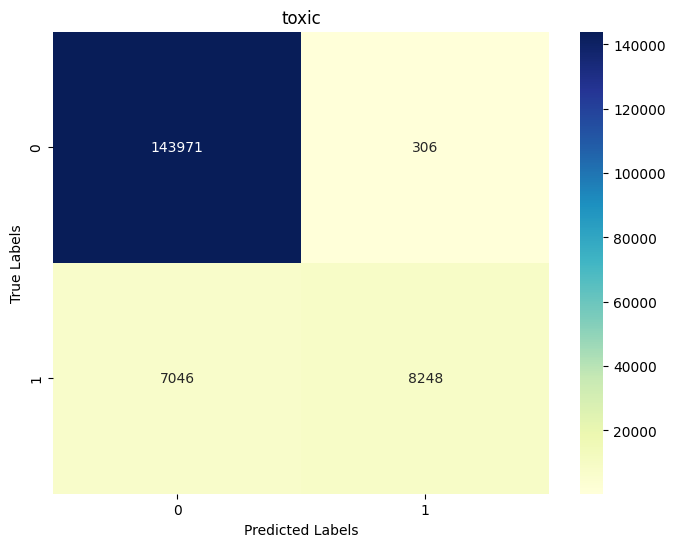

CV score for class severe_toxic is 0.9875035753304036
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    157976
           1       0.62      0.18      0.28      1595

    accuracy                           0.99    159571
   macro avg       0.81      0.59      0.64    159571
weighted avg       0.99      0.99      0.99    159571



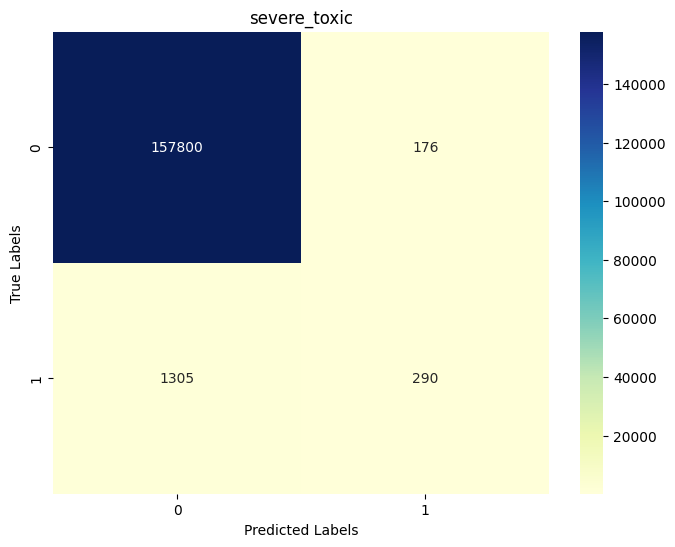

CV score for class obscene is 0.9850696094162433
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    151122
           1       0.95      0.57      0.71      8449

    accuracy                           0.98    159571
   macro avg       0.96      0.78      0.85    159571
weighted avg       0.98      0.98      0.97    159571



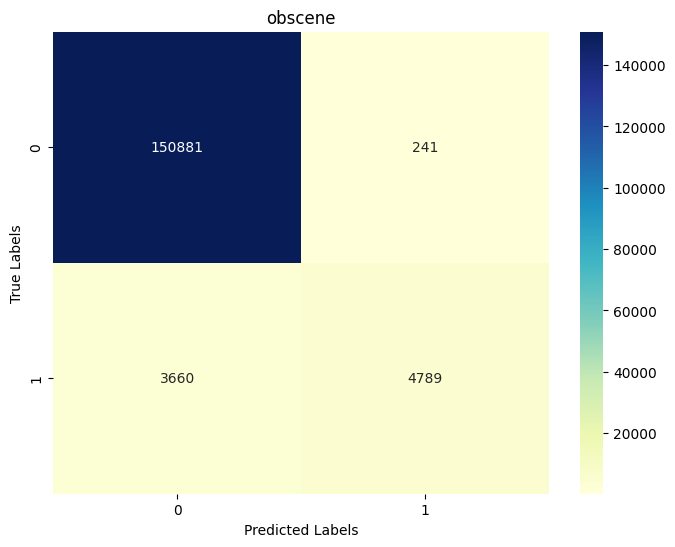

CV score for class threat is 0.9826279575972473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159093
           1       1.00      0.00      0.00       478

    accuracy                           1.00    159571
   macro avg       1.00      0.50      0.50    159571
weighted avg       1.00      1.00      1.00    159571



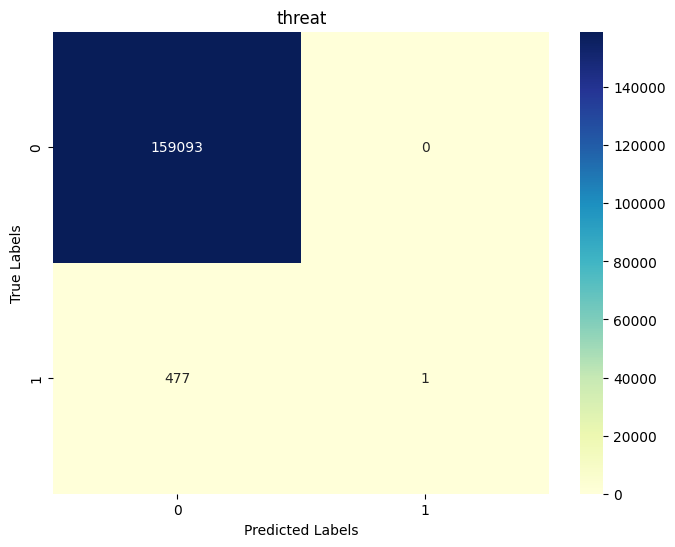

CV score for class insult is 0.9778182005554678
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    151694
           1       0.87      0.46      0.60      7877

    accuracy                           0.97    159571
   macro avg       0.92      0.73      0.79    159571
weighted avg       0.97      0.97      0.97    159571



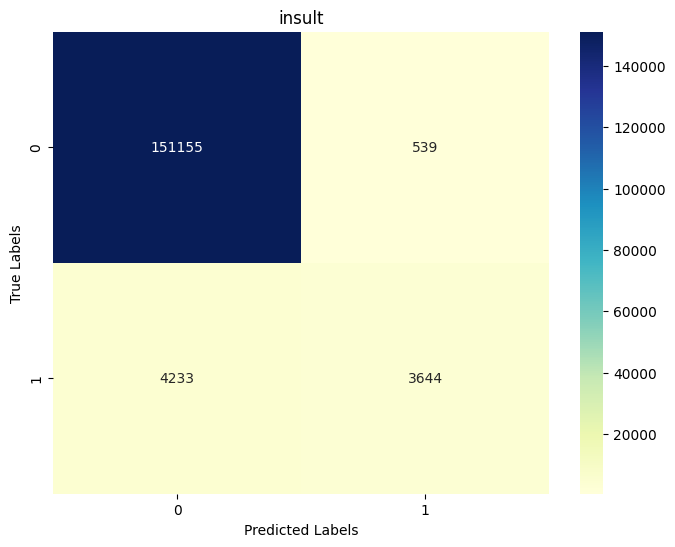

CV score for class identity_hate is 0.9733055781825319
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    158166
           1       0.75      0.08      0.15      1405

    accuracy                           0.99    159571
   macro avg       0.87      0.54      0.57    159571
weighted avg       0.99      0.99      0.99    159571



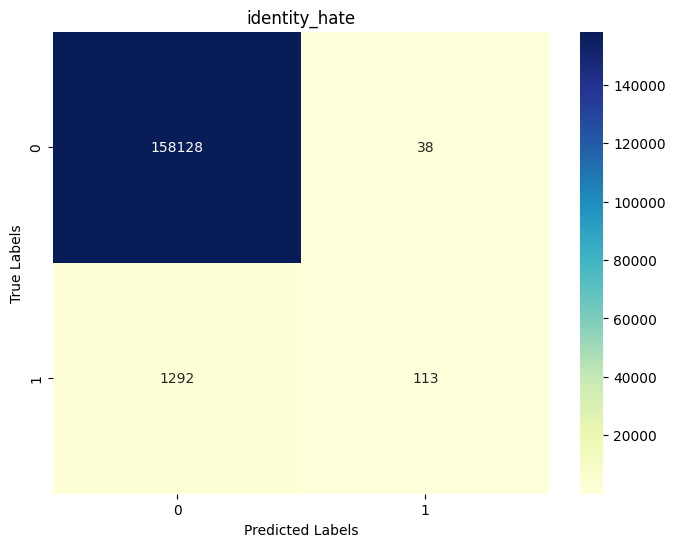

Total CV score is 0.9794135256240356


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

scores = []
classifiers = {}
submission = pd.DataFrame.from_dict({'id': df_test['id']})
for class_name in class_names:
    train_target = df_train[class_name]
    classifier = LogisticRegression(C=0.1, solver='sag')

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    predictions = classifier.predict(train_features)

    print(classification_report(train_target, predictions))
    cm = confusion_matrix(train_target, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(class_name)
    plt.show()

    submission[class_name] = classifier.predict_proba(test_features)[:, 1]
    classifiers[class_name] = classifier

print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

In [ ]:
# Function to preprocess and transform manual input
def preprocess_and_predict(input_text, word_vectorizer, char_vectorizer, classifiers, class_names):
    # Transform input text
    word_features = word_vectorizer.transform([input_text])
    char_features = char_vectorizer.transform([input_text])
    input_features = hstack([char_features, word_features])

    # Predict using each classifier
    predictions = {}
    for class_name in class_names:
        predictions[class_name] = classifiers[class_name].predict_proba(input_features)[:, 1][0]

    return predictions

In [ ]:
# Test manual input
input_text = "Die fucking nigger"
predictions = preprocess_and_predict(input_text, word_vectorizer, char_vectorizer, classifiers, class_names)

# Print predictions
print(f"Input text: {input_text}")
for class_name, prob in predictions.items():
    print(f"Probability of being {class_name}: {prob:.4f}")

Input text: Die fucking nigger
Probability of being toxic: 0.9990
Probability of being severe_toxic: 0.7134
Probability of being obscene: 0.9986
Probability of being threat: 0.1791
Probability of being insult: 0.9773
Probability of being identity_hate: 0.8722


In [ ]:
# Test manual input
input_text = "I hope you fucking kill yourself"
predictions = preprocess_and_predict(input_text, word_vectorizer, char_vectorizer, classifiers, class_names)

# Print predictions
print(f"Input text: {input_text}")
for class_name, prob in predictions.items():
    print(f"Probability of being {class_name}: {prob:.4f}")


Input text: I hope you fucking kill yourself
Probability of being toxic: 0.9986
Probability of being severe_toxic: 0.5848
Probability of being obscene: 0.9942
Probability of being threat: 0.6858
Probability of being insult: 0.9465
Probability of being identity_hate: 0.1471


In [ ]:
# Test manual input
input_text = "Good job man"
predictions = preprocess_and_predict(input_text, word_vectorizer, char_vectorizer, classifiers, class_names)

# Print predictions
print(f"Input text: {input_text}")
for class_name, prob in predictions.items():
    print(f"Probability of being {class_name}: {prob:.4f}")


Input text: Good job man
Probability of being toxic: 0.1025
Probability of being severe_toxic: 0.0102
Probability of being obscene: 0.0411
Probability of being threat: 0.0036
Probability of being insult: 0.0376
Probability of being identity_hate: 0.0135
